In [18]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [35]:
import gymnasium as gym
import numpy as np
import flappy_bird_gymnasium

env = gym.make(
    "FlappyBird-v0", audio_on=False, render_mode="rgb_array", use_lidar=False
)

# Introduction to the Environment
A DQN agent will be trained to play the game of Flappy Bird.

### Action space
* 0 - **do nothing**
* 1 - **flap**

### Rewards
* +0.1 - **every frame it stays alive**
* +1.0 - **successfully passing a pipe**
* -1.0 - **dying**
* −0.5 - **touch the top of the screen**

### State Space
The environment offers two options for the state space but we will not use those options. We will instead use the RGB image from env.render() as our observation.

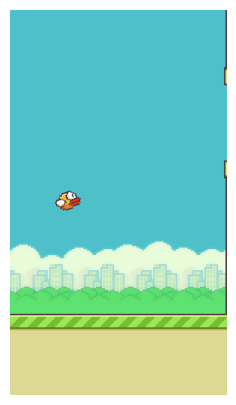

In [46]:
from IPython.display import HTML
from utils import *
frames = []
s, _ = env.reset(seed=42)

while True:
    a = env.action_space.sample()
    s, r, terminated, truncated, info = env.step(a)
    rgb_image = env.render()
    frames.append(rgb_image)
    if terminated or truncated:
        break

anim = animate(frames)
HTML(anim.to_jshtml())

From playing the animation, we see that the game starts immediately. Thus we set the default of initial_no_op in the environment wrapper to 0.

In [5]:
# Checking the dimensions of the frames
print(frames[0].shape)

(512, 288, 3)


Cropped and resized frames

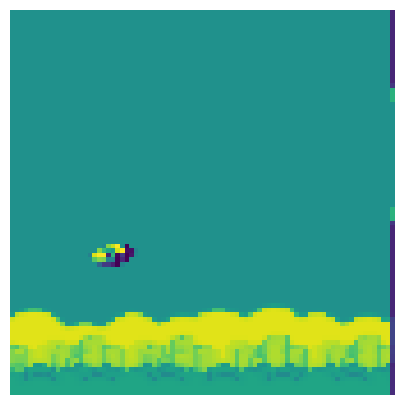

In [6]:
from utils import *
for i in range(len(frames)):
    frames[i] = preprocess(frames[i])
anim = animate(frames)
HTML(anim.to_jshtml())

REMEMBER TO CROP AND RESIZE EACH FRAME before we pass it into our Q-network, which is a CNN that accepts images of 84x84. This should be handled inside env_wrapper.py and utils.py.

In [16]:
from env_wrapper import EnvWrapper
wrap = EnvWrapper(env)
s, _ = wrap.reset()
print(s.shape)
s, r, terminated, truncated, info = wrap.step(a)
print(s.shape)

(4, 84, 84)
(4, 84, 84)


In [28]:
s,_=wrap.reset()

# DQN Time!

In [25]:
import DQN
import utils
import model

trainerDQN = DQN.DQN(EnvWrapper(env),
                     model.CNN,
                     lr = 0.00025,
                     gamma = 0.95,
                     buffer_size=10000,
                     batch_size=16,
                     loss_fn = "mse_loss",
                     device = 'cpu',
                     seed = 42,
                     epsilon_scheduler = utils.exponential_decay(1, 700, 0.1),
                     save_path = utils.get_save_path("DQN", "./runs/"))

train_reward_history, train_loss_history, val_reward_history, val_std_history = trainerDQN.train(200,50,30,50,50)

saving to ./runs/DQN\run2
Episode: 3 Time: 1.2657406330108643 Total Reward: -7.499999999999998 Avg_Loss: 0.09268198162317276
Episode: 4 Time: 1.2827568054199219 Total Reward: -6.899999999999999 Avg_Loss: 0.09213016465306283
Episode: 5 Time: 1.292839527130127 Total Reward: -8.7 Avg_Loss: 0.08899267077445984
Episode: 6 Time: 1.2434568405151367 Total Reward: -8.099999999999998 Avg_Loss: 0.0884674523025751
Episode: 7 Time: 1.2732014656066895 Total Reward: -7.499999999999998 Avg_Loss: 0.08823949858546257
Episode: 8 Time: 1.2636830806732178 Total Reward: -7.499999999999998 Avg_Loss: 0.09862289667129516
Episode: 9 Time: 1.3567981719970703 Total Reward: -8.099999999999998 Avg_Loss: 0.08960663497447968
Episode: 10 Time: 1.2702593803405762 Total Reward: -7.499999999999998 Avg_Loss: 0.10224597074091435
Episode: 11 Time: 1.2786204814910889 Total Reward: -8.099999999999998 Avg_Loss: 0.09044199161231518
Episode: 12 Time: 1.2533676624298096 Total Reward: -8.099999999999998 Avg_Loss: 0.110878123268485

KeyboardInterrupt: 